In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Label: 9

Pixel Array: 
[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.      

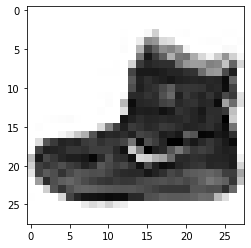

In [19]:
index = 0

np.set_printoptions(linewidth=320)

print(f'Label: {train_labels[index]}')
print(f'\nPixel Array: \n{train_images[index]}')

plt.imshow(train_images[index], cmap='Greys')

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(64, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [29]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(128, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(64, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [25]:
## Sample Inputs for Tensors
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Inputs for Softmax Function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get sum of all values after the softmax 
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class wit highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class wit highest probability: 2


In [26]:
model.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
model2.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
model2.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4935 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3687 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3297 - accuracy: 0.8775
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3071 - accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2764 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2643 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2557 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [32]:
model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8815


[0.34076255559921265, 0.8815000057220459]

In [38]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(64, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(128, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(32, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model4.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
model4.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5085 - accuracy: 0.8184
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3741 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3414 - accuracy: 0.8738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3172 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.8883
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2871 - accuracy: 0.8926
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2752 - accuracy: 0.8984
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9002
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9028
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.246

In [40]:
model4.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.8807


[0.32897233963012695, 0.8806999921798706]

In [42]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(128, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(512, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model5.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [43]:
model5.fit(
    train_images,
    train_labels,
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4743 - accuracy: 0.8296
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3549 - accuracy: 0.8696
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3228 - accuracy: 0.8810
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2980 - accuracy: 0.8892
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2819 - accuracy: 0.8935
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2696 - accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2568 - accuracy: 0.9037
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2445 - accuracy: 0.9066
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2346 - accuracy: 0.9123
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.223

In [44]:
model5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8875


[0.3324171304702759, 0.887499988079071]

In [45]:
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(512, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(64, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model6.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model6.fit(
    train_images,
    train_labels,
    epochs=10
)

model6.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4767 - accuracy: 0.8287
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3626 - accuracy: 0.8678
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3247 - accuracy: 0.8809
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3018 - accuracy: 0.8887
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2831 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2687 - accuracy: 0.8999
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2543 - accuracy: 0.9051
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2432 - accuracy: 0.9089
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2334 - accuracy: 0.9114
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3265 

[0.32648128271102905, 0.8891000151634216]

In [46]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(16, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(32, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(16, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model7.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model7.fit(
    train_images,
    train_labels,
    epochs=10
)

model7.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6080 - accuracy: 0.7881
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4305 - accuracy: 0.8465
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3940 - accuracy: 0.8592
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3709 - accuracy: 0.8663
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3565 - accuracy: 0.8699
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3468 - accuracy: 0.8720
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3368 - accuracy: 0.8760
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3285 - accuracy: 0.8793
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3218 - accuracy: 0.8818
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.3900 

[0.3899846076965332, 0.8597000241279602]

In [47]:
model8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(16, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(32, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model8.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model8.fit(
    train_images,
    train_labels,
    epochs=10
)

model8.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5929 - accuracy: 0.7926
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4337 - accuracy: 0.8479
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4045 - accuracy: 0.8563
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3837 - accuracy: 0.8641
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3720 - accuracy: 0.8656
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3584 - accuracy: 0.8714
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3486 - accuracy: 0.8733
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3420 - accuracy: 0.8776
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3349 - accuracy: 0.8785
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 0.3890 

[0.38897138833999634, 0.8611000180244446]

In [51]:
model9 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(64, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(64, activation=tf.nn.relu6), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(256, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model9.compile(
    optimizer = tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model9.fit(
    train_images,
    train_labels,
    epochs=10
)

model9.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4995 - accuracy: 0.8205
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3420 - accuracy: 0.8738
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3201 - accuracy: 0.8813
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3008 - accuracy: 0.8866
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2856 - accuracy: 0.8925
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2766 - accuracy: 0.8967
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2658 - accuracy: 0.8987
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2589 - accuracy: 0.9015
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.3384 

[0.3384297490119934, 0.8791999816894531]

In [ ]:
m10 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(256, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

m10.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

m10.fit(
    train_images,
    train_labels,
    epochs=10
)

m10.evaluate(test_images, test_labels)

In [56]:
class tfCallBack(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.2):
            print('\nTarget Fucking Reached.')
            self.model.stop_training = True

In [59]:
callback = tfCallBack()

m11 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(512, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

m11.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

m11.fit(
    train_images,
    train_labels,
    epochs=72,
    callbacks=[callback]
)

m11.evaluate(test_images, test_labels)

Epoch 1/72
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4731 - accuracy: 0.8314
Epoch 2/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3579 - accuracy: 0.8690
Epoch 3/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3221 - accuracy: 0.8821
Epoch 4/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2984 - accuracy: 0.8881
Epoch 5/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2783 - accuracy: 0.8978
Epoch 6/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2645 - accuracy: 0.9011
Epoch 7/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2538 - accuracy: 0.9050
Epoch 8/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2404 - accuracy: 0.9101
Epoch 9/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2313 - accuracy: 0.9130
Epoch 10/72
1875/1875 [==============================] - 8s 4ms/step - loss: 0.22

[0.3447337746620178, 0.885699987411499]

In [1]:
callback = tfCallBack()

m11 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     ## Turns into a simple linear array:P
    keras.layers.Dense(18, activation=tf.nn.relu), ## y = W0X0 + W1X1 + W2X2... wNxN = 9
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

m11.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

m11.fit(
    train_images,
    train_labels,
    epochs=72,
    callbacks=[callback]
)

m11.evaluate(test_images, test_labels)

NameError: ignored